In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten

In [4]:
import os
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser

In [5]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [7]:
from pathlib import Path


base_dir = Path("I://SM//python//DE Project-20240721T041710Z-001//DE Project//split")

In [8]:
train_dir = base_dir /"train/" 
val_dir = base_dir /"val/"
test_dir = base_dir /"test/"

In [9]:
listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [10]:
train_normal_dir = train_dir /"NORMAL" #to set the path to the normals in train set
train_pneumonia_dir = train_dir /"PNEUMONIA"  

In [11]:
os.listdir(val_dir)

['NORMAL', 'PNEUMONIA']

In [12]:
valid_normal_dir = val_dir /"NORMAL" #to set the path to the normals in validation set
valid_pneumonia_dir = val_dir /"PNEUMONIA"

In [13]:
os.listdir(test_dir)

['NORMAL', 'PNEUMONIA']

In [14]:
test_normal_dir = test_dir /"NORMAL" #to set the path to the normals in test set
test_pneumonia_dir = test_dir /"PNEUMONIA"

In [15]:
train_normal= train_normal_dir.glob("*.jpeg") #to take the normal images from train set 
train_pneumonia=train_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the train set
train_set=[]

In [16]:
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) 

In [17]:



import pandas as pd


train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)#to

In [18]:
train_set.head()

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,0


In [19]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,1


In [20]:
valid_normal= valid_normal_dir.glob("*.jpeg") #to take the normal images from validation set 
valid_pneumonia=valid_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the validation set
valid_set=[] #to add all the validation data into one list, we created a blank list

In [21]:
for img in valid_normal: #to add every image of normals in validationset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in validationset to the list
  valid_set.append((img, 1))
  
  
  
    
 


In [22]:
print(valid_set[:15])

[(WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0501-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0502-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0503-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0506-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0507-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0508-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0509-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/val/NORMAL/NORMAL2-IM-0511-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-2

In [23]:
import pandas as pd


valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,0


In [24]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,0


In [25]:
test_normal= test_normal_dir.glob("*.jpeg") #to take the normal images from test set 
test_pneumonia=test_pneumonia_dir.glob("*.jpeg") #to take the pneumonia images from the test set
test_set=[]#to add all the test data into one list, we created a blank list

In [26]:
for img in test_normal: #to add every image of normals in test set to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in test set to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label


In [27]:
print(test_set[:15]) #to check what our list look like

[(WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0001-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0003-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0005-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0006-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0007-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0009-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0010-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM-0011-0001-0001.jpeg'), 0), (WindowsPath('I:/SM/python/DE Project-20240721T041710Z-001/DE Project/split/test/NORMAL/IM

In [28]:

test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,0


In [29]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

,image,label
0,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
1,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
2,I:\SM\python\DE Project-20240721T041710Z-001\D...,0
3,I:\SM\python\DE Project-20240721T041710Z-001\D...,1
4,I:\SM\python\DE Project-20240721T041710Z-001\D...,0


In [30]:
# Normal Image
train_normal_count= train_set.loc[train_set["label"]==0]["image"].count()
print("Total number of normal images:", train_normal_count)

Total number of normal images: 2991


In [31]:
# Pneumonia Image
train_pneumonia_count= train_set.loc[train_set["label"]==1]["image"].count()
print("Total number of pneumonia images:", train_pneumonia_count)

Total number of pneumonia images: 2991


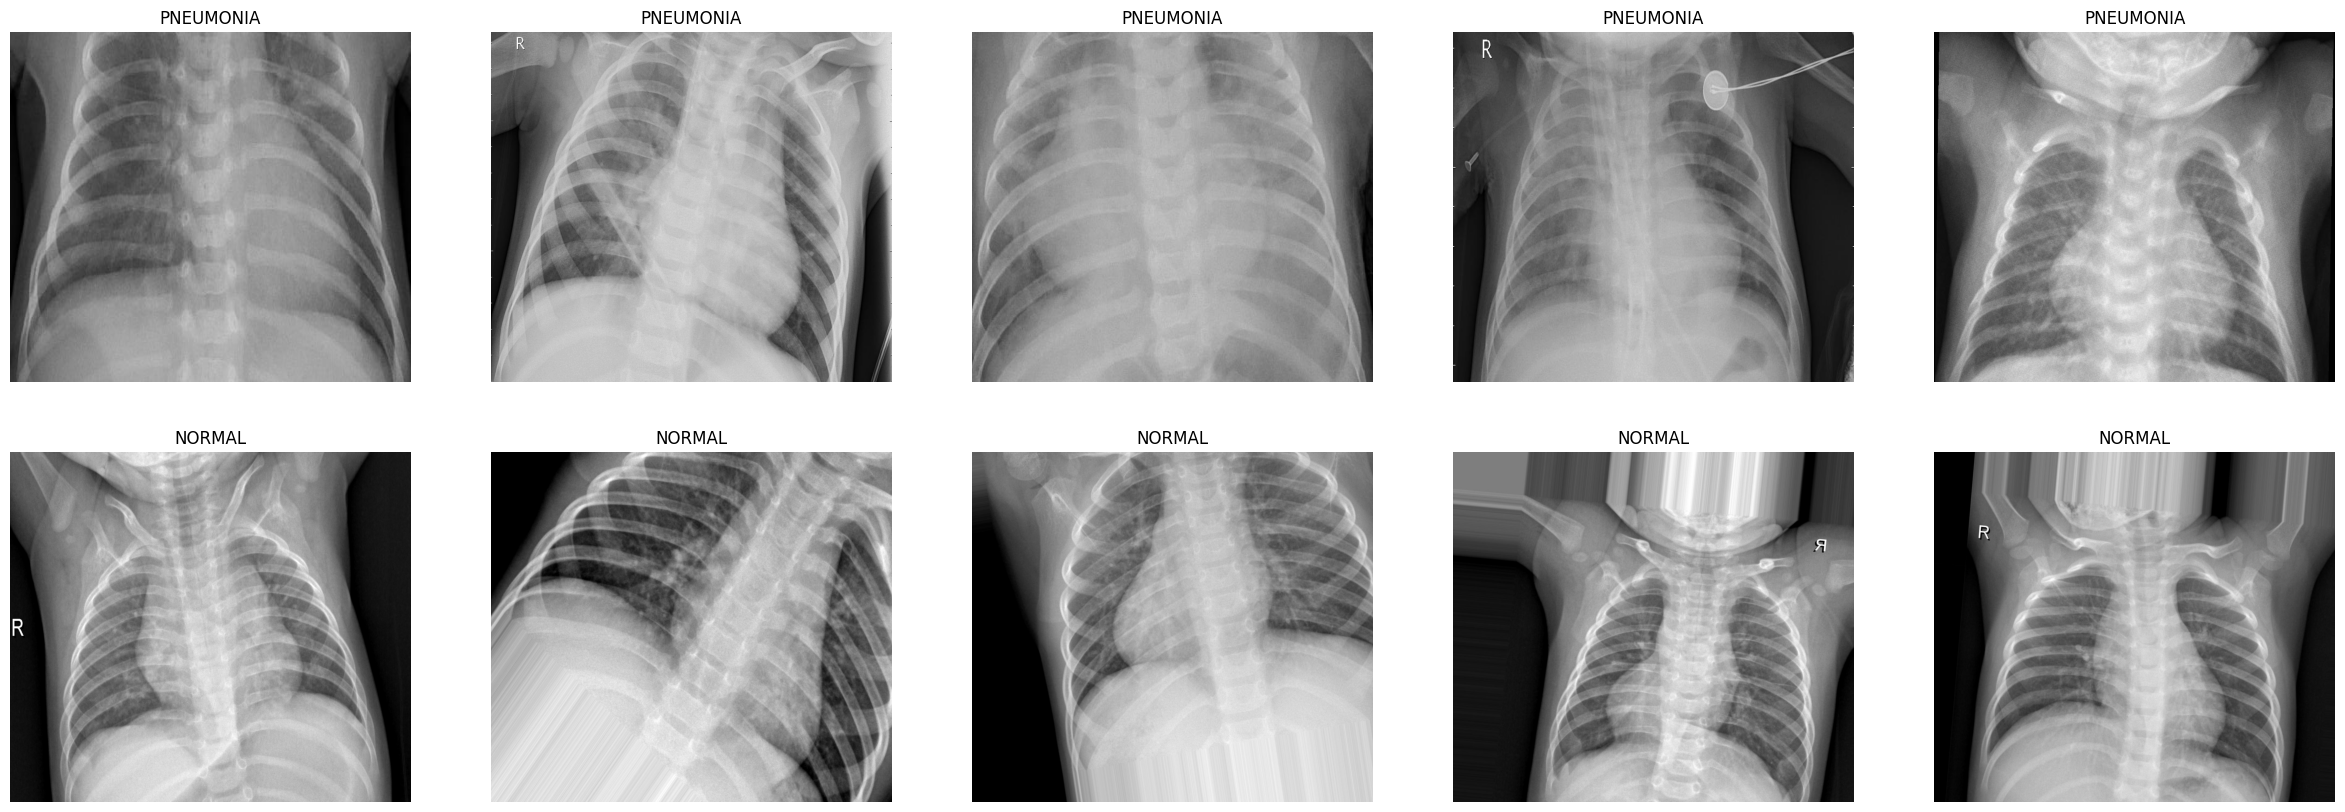

In [32]:
# Get few samples for both the classes
from skimage.io import imread
from skimage.transform import resize
pneumonia_samples = (train_set[train_set["label"] == 1]["image"].iloc[:5]).tolist()
normal_samples = (train_set[train_set["label"] == 0]["image"].iloc[:5]).tolist()

# Concate the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize = (30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i % 5].set_title("PNEUMONIA")
    else:
        ax[i//5, i % 5].set_title("NORMAL")
    ax[i//5, i % 5].axis('off')
    ax[i//5, i % 5].set_aspect('auto')
plt.show()

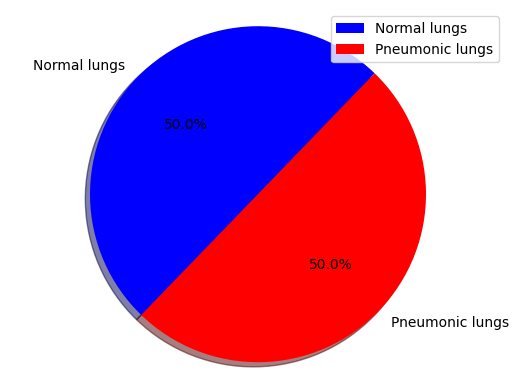

In [33]:
fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal lungs","Pneumonic lungs"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Case Distribution After Data Augmentation')

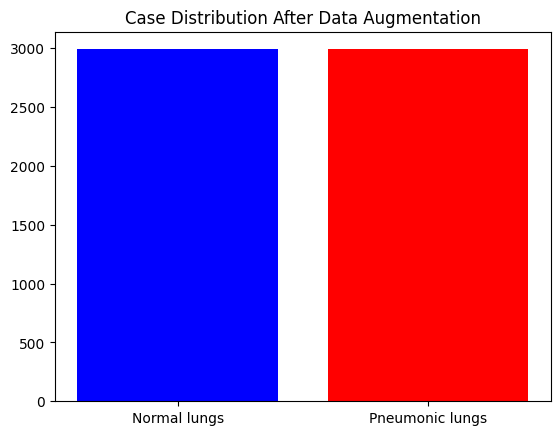

In [34]:
fig2, ax2=plt.subplots()
ax2.bar(height=sizes, x=["Normal lungs", "Pneumonic lungs"], color=["blue", "red"])
plt.title("Case Distribution After Data Augmentation")

In [35]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [36]:
for layer in vgg.layers:
    layer.trainable = False

In [37]:
folders = glob('split/train/*')
x = Flatten()(vgg.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [39]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('I:\SM\python\DE Project-20240721T041710Z-001\DE Project\split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('I:\SM\python\DE Project-20240721T041710Z-001\DE Project\split/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5982 images belonging to 2 classes.
Found 1282 images belonging to 2 classes.


In [42]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 504s 838ms/step - accuracy: 0.8949 - loss: 0.2881 - val_accuracy: 0.8853 - val_loss: 0.4854
Epoch 2/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 484s 806ms/step - accuracy: 0.9615 - loss: 0.1095 - val_accuracy: 0.7949 - val_loss: 1.3197
Epoch 4/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 536s 894ms/step - accuracy: 0.9701 - loss: 0.0948 - val_accuracy: 0.9298 - val_loss: 0.3620


In [43]:
evaluation = model.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 680ms/step - accuracy: 0.9333 - loss: 0.3984
Test Accuracy: 92.98%
599/599 ━━━━━━━━━━━━━━━━━━━━ 408s 681ms/step - accuracy: 0.9850 - loss: 0.0551
Train Accuracy: 98.41%


In [44]:
import tensorflow as tf
from keras.models import load_model

model.save('final5.h5')

In [45]:
from keras.models import load_model

In [46]:
from keras.preprocessing import image

In [47]:
from keras.applications.vgg16 import preprocess_input

In [48]:
import numpy as np


In [49]:
model=load_model('final.h5')

In [50]:
img=image.load_img('I:\\SM\\python\\DE Project-20240721T041710Z-001\\DE Project\\split\\train\\PNEUMONIA\\person3_bacteria_10.jpeg', target_size=(224,224))

In [51]:
x=image.img_to_array(img)

In [52]:
x=np.expand_dims(x, axis=0)

In [53]:
img_data=preprocess_input(x)

In [54]:
classes=model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [55]:
result=int(classes[0][0])

In [56]:
if  result==0:
    print("Affected By PNEUMONIA")
else:
    print("Result is NORMAL")

Affected By PNEUMONIA


In [57]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

AttributeError: 'Functional' object has no attribute 'predict_classes'